In [ ]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█                               | 20.7 MB 26.7 MB/s eta 0:00:27

In [1]:
import torch
# 현재 Setup 되어있는 device 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print ('사용 가능한 GPU 개수 :', torch.cuda.device_count(), '개')
print ('현재 사용 중인 GPU 번호 :', torch.cuda.current_device(), '번')
print('GPU 모델명 :', torch.cuda.get_device_name(device))

사용 가능한 GPU 개수 : 1 개
현재 사용 중인 GPU 번호 : 0 번
GPU 모델명 : Tesla P100-PCIE-16GB


In [ ]:
# GPU 할당 변경하기 : 원하는 GPU 번호를 입력해주세요 (0 or 1)
#GPU_NUM = 1


#device = torch.device(f'cuda:{GPU_NUM}' if torch.cuda.is_available() else 'cpu')
#torch.cuda.set_device(device) # change allocation of current GPU
#print ('현재 사용 중인 GPU :', torch.cuda.current_device(), '번')

# Additional Infos
#if device.type == 'cuda':
#    print(torch.cuda.get_device_name(GPU_NUM))
#    print('---Memory Usage---')
#    print('Allocated:', round(torch.cuda.memory_allocated(GPU_NUM)/1024**3,1), 'GB')
#    print('Cached:   ', round(torch.cuda.memory_cached(GPU_NUM)/1024**3,1), 'GB')

In [ ]:
!nvidia-smi

Mon Oct 25 22:14:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:05.0 Off |                  Off |
| N/A   37C    P0    38W / 300W |     10MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:00:06.0 Off |                  Off |
| N/A   34C    P0    40W / 300W |     10MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
# Install dependencies.  Note that pytorch and torchvision are pre-installed 
# in standard Colab instances, so no need to worry about those.
!pip install pytorch_lightning --ignore-installed PyYAML

     |████████████████████████████████| 925 kB 4.3 MB/s 
     |████████████████████████████████| 596 kB 60.1 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:40tcmalloc: large alloc 1147494400 bytes == 0x55cf22bfe000 @  0x7f89daded615 0x55cee934a4cc 0x55cee942a47a 0x55cee934d2ed 0x55cee943ee1d 0x55cee93c0e99 0x55cee93bb9ee 0x55cee934ebda 0x55cee93c0d00 0x55cee93bb9ee 0x55cee934ebda 0x55cee93bd737 0x55cee943fc66 0x55cee93bcdaf 0x55cee943fc66 0x55cee93bcdaf 0x55cee943fc66 0x55cee93bcdaf 0x55cee934f039 0x55cee9392409 0x55cee934dc52 0x55cee93c0c25 0x55cee93bb9ee 0x55cee934ebda 0x55cee93bd737 0x55cee93bb9ee 0x55cee934ebda 0x55cee93bc915 0x55cee934eafa 0x55cee93bcc0d 0x55cee93bb9ee
     |████████████████████████████████| 881.9 MB 20 kB/s 
     |████████████████████████████████| 829 kB 54.1 MB/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 
     |████████████████████████████████| 40 kB 6.9 MB/s 
     |████████████████████████████████| 282 kB 42.1 MB/s 
     

In [3]:
!pip install kornia

     |████████████████████████████████| 367 kB 5.2 MB/s 


In [4]:
# import random
from typing import Callable, Tuple

from kornia import augmentation as aug
from kornia import filters
from kornia.geometry import transform as tf
import torch
from torch import nn, Tensor


class RandomApply(nn.Module):
    def __init__(self, fn: Callable, p: float):
        super().__init__()
        self.fn = fn
        self.p = p

    def forward(self, x: Tensor) -> Tensor:
        return x if random.random() > self.p else self.fn(x)


def default_augmentation(image_size: Tuple[int, int] = (224, 224)) -> nn.Module:
    return nn.Sequential(
        tf.Resize(size=image_size),
        RandomApply(aug.ColorJitter(0.8, 0.8, 0.8, 0.2), p=0.8),
        aug.RandomGrayscale(p=0.2),
        aug.RandomHorizontalFlip(),
        RandomApply(filters.GaussianBlur2d((3, 3), (1.5, 1.5)), p=0.1),
        aug.RandomResizedCrop(size=image_size),
        aug.Normalize(
            mean=torch.tensor([0.485, 0.456, 0.406]),
            std=torch.tensor([0.229, 0.224, 0.225]),
        ),
    )

In [5]:
!pip install IPython

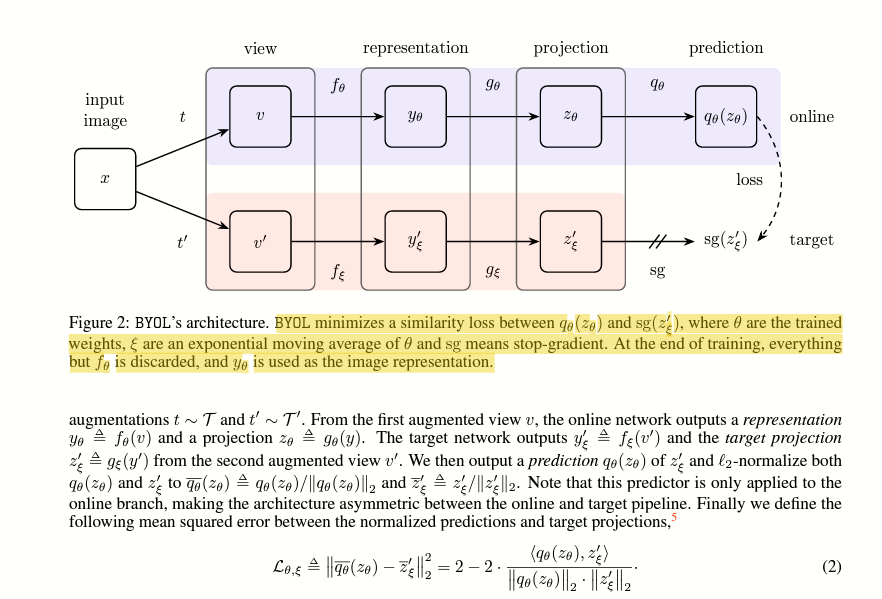

In [6]:
from IPython.display import Image
Image("byol_2.PNG")


*   1) target representation을 뽑아내는 target network
*   2) target의 prediciton을 뽑아내는 online network

*encoder* **f**

> f는 일반적인 합성곱 신경망이고 encoder라고 부르겠다. paper에서처럼 resnet 50을 활용






---
*projector* **g** *predictor* **q**

> MLP로 구성되어 있고 당연히 g와 q는 이미지의 차원을 줄이는 역할




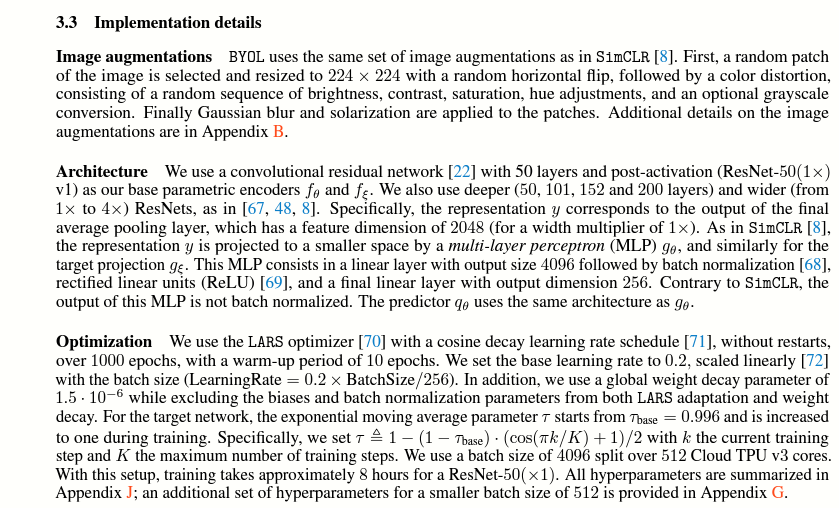

In [7]:
from IPython.display import Image
Image("byol_architecture.PNG")

BYOL의 목표는 downstream task에서 사용될 representation y를 학습하는 것이다.



 Encoder is responsible for extracting features from the base model, and projecting those features into a lower-dimensional, latent space

## BYOL architecture에서 필요한 encoder는 EncoderWrapper클래스로, projection layer는 mlp 메서드로 선언

In [ ]:
from typing import Union


def mlp(dim: int, projection_size: int = 256, hidden_size: int = 4096) -> nn.Module:
    return nn.Sequential(
        nn.Linear(dim, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.ReLU(inplace=True),
        nn.Linear(hidden_size, projection_size),
    )
## SimCLR와 달리 BYOL은 projector의 hidden  size와 ouput size를 각각 4096 , 256으로 조정


class EncoderWrapper(nn.Module):
    def __init__(
        self,
        model: nn.Module,
        projection_size: int = 256,
        hidden_size: int = 4096,
        layer: Union[str, int] = -2,
    ):
        super().__init__()
        self.model = model
        self.projection_size = projection_size
        self.hidden_size = hidden_size
        self.layer = layer

        self._projector = None
        self._projector_dim = None
        self._encoded = torch.empty(0)
        self._register_hook()
## Projector:일반적인 선형 레이어
    @property
    def projector(self):
        if self._projector is None:
            self._projector = mlp(
                self._projector_dim, self.projection_size, self.hidden_size
            )
        return self._projector
## hook 메서드를 통해서 feature extraction을 구현하였고 이를 통해 generate feature
## cf) https://medium.com/the-dl/how-to-use-pytorch-hooks-5041d777f904
 ## collects outputs from
    def _hook(self, _, __, output):
        output = output.flatten(start_dim=1)
        if self._projector_dim is None:
            self._projector_dim = output.shape[-1]
        self._encoded = self.projector(output)

    def _register_hook(self):
        if isinstance(self.layer, str):
            layer = dict([*self.model.named_modules()])[self.layer]
        else:
            layer = list(self.model.children())[self.layer]

        layer.register_forward_hook(self._hook)

    def forward(self, x: Tensor) -> Tensor:
        _ = self.model(x)
        return self._encoded

In [ ]:
from copy import deepcopy
from itertools import chain
from typing import Dict, List

import pytorch_lightning as pl
from torch import optim
import torch.nn.functional as f


def normalized_mse(x: Tensor, y: Tensor) -> Tensor:
    x = f.normalize(x, dim=-1)
    y = f.normalize(y, dim=-1)
    return 2 - 2 * (x * y).sum(dim=-1)


class BYOL(pl.LightningModule):
    def __init__(
        self,
        model: nn.Module,
        image_size: Tuple[int, int] = (96, 96),
        hidden_layer: Union[str, int] = -2,
        projection_size: int = 256,
        hidden_size: int = 4096,
        augment_fn: Callable = None,
        beta: float = 0.999,
        **hparams,
    ):
        super().__init__()
        self.augment = default_augmentation(image_size) if augment_fn is None else augment_fn
        self.beta = beta
        self.encoder = EncoderWrapper(
            model, projection_size, hidden_size, layer=hidden_layer
        )
        self.predictor = nn.Linear(projection_size, projection_size, hidden_size)
        for key in hparams.keys():
            self.hparams[key]=hparams[key]
        self._target = None

        self.encoder(torch.zeros(2, 3, *image_size))

    def forward(self, x: Tensor) -> Tensor:
        return self.predictor(self.encoder(x))

    @property
    def target(self):
        if self._target is None:
            self._target = deepcopy(self.encoder)
        return self._target

    def update_target(self):
        for p, pt in zip(self.encoder.parameters(), self.target.parameters()):
            pt.data = self.beta * pt.data + (1 - self.beta) * p.data

    # --- Methods required for PyTorch Lightning only! ---

    def configure_optimizers(self):
        optimizer = getattr(optim, self.hparams.get("optimizer", "Adam"))
        lr = self.hparams.get("lr", 1e-4)
        weight_decay = self.hparams.get("weight_decay", 1e-6)
        return optimizer(self.parameters(), lr=lr, weight_decay=weight_decay)

    def training_step(self, batch, *_) -> Dict[str, Union[Tensor, Dict]]:
        x = batch[0]
        with torch.no_grad():
            x1, x2 = self.augment(x), self.augment(x)

        pred1, pred2 = self.forward(x1), self.forward(x2)
        with torch.no_grad():
            targ1, targ2 = self.target(x1), self.target(x2)
        loss = torch.mean(normalized_mse(pred1, targ2) + normalized_mse(pred2, targ1))

        self.log("train_loss", loss.item())
        self.update_target()

        return {"loss": loss}

    @torch.no_grad()
    def validation_step(self, batch, *_) -> Dict[str, Union[Tensor, Dict]]:
        x = batch[0]
        x1, x2 = self.augment(x), self.augment(x)
        pred1, pred2 = self.forward(x1), self.forward(x2)
        targ1, targ2 = self.target(x1), self.target(x2)
        loss = torch.mean(normalized_mse(pred1, targ2) + normalized_mse(pred2, targ1))

        return {"loss": loss}

    @torch.no_grad()
    def validation_epoch_end(self, outputs: List[Dict]) -> Dict:
        val_loss = sum(x["loss"] for x in outputs) / len(outputs)
        self.log("val_loss", val_loss.item())

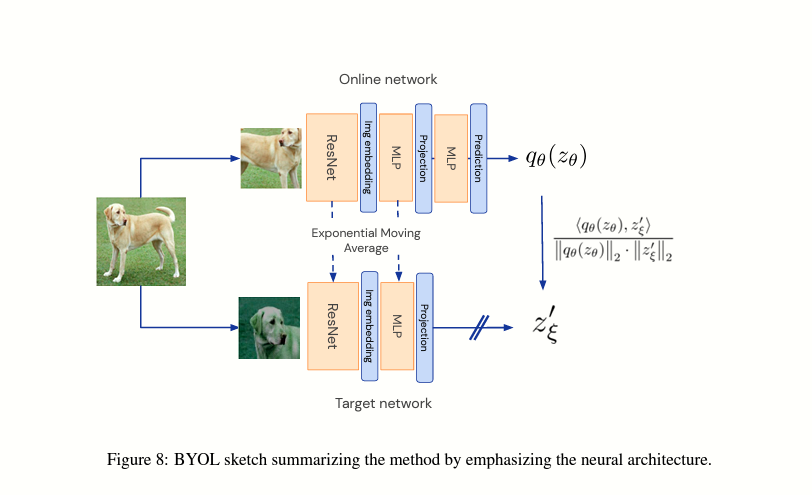

In [8]:
from IPython.display import Image
Image("EMA.PNG")

online network는 target network 에서 생성하는 representation을 예측하도록 학습이 되며 target 네트워크의 파라미터 업데이트는 online의 exponential moving average를 사용하기 때문에 stop gradient(sg)라고 표현되어 있다.

stop gradient의 의미에 대한 고찰은 추가적으로 노트의 하단 마지막 셀에서...to be continued

## Supervised Training Module

### Lightning Module for typical supervised training

In [ ]:
class SupervisedLightningModule(pl.LightningModule):
    def __init__(self, model: nn.Module, **hparams):
        super().__init__()
        self.model = model

    def forward(self, x: Tensor) -> Tensor:
        return self.model(x)

    def configure_optimizers(self):
        optimizer = getattr(optim, self.hparams.get("optimizer", "Adam"))
        lr = self.hparams.get("lr", 1e-4)
        weight_decay = self.hparams.get("weight_decay", 1e-6)
        return optimizer(self.parameters(), lr=lr, weight_decay=weight_decay)

    def training_step(self, batch, *_) -> Dict[str, Union[Tensor, Dict]]:
        x, y = batch
        loss = f.cross_entropy(self.forward(x), y)
        self.log("train_loss", loss.item())
        return {"loss": loss}

    @torch.no_grad()
    def validation_step(self, batch, *_) -> Dict[str, Union[Tensor, Dict]]:
        x, y = batch
        loss = f.cross_entropy(self.forward(x), y)
        return {"loss": loss}

    @torch.no_grad()
    def validation_epoch_end(self, outputs: List[Dict]) -> Dict:
        val_loss = sum(x["loss"] for x in outputs) / len(outputs)
        self.log("val_loss", val_loss.item())

### STL10 Datasets

We need 3 separate datasets from STL10 for this experiment:
1. `"train"` -- Contains only labeled training images. Used for supervised training.
2. `"train+unlabeled"` -- Contains training images, plus a large number of unlabelled images.  Used for self-supervised learning with BYOL.
3. `"test"` -- Labeled test images.  We use it both as a validation set, and for computing the final model accuracy.

In [ ]:
from torchvision.datasets import STL10
from torchvision.transforms import ToTensor


TRAIN_DATASET = STL10(root="data", split="train", download=True, transform=ToTensor())
TRAIN_UNLABELED_DATASET = STL10(
    root="data", split="train+unlabeled", download=True, transform=ToTensor()
)
UNLABELED_DATASET = STL10 (root = "data", split="unlabeled", download = True, transform = ToTensor())
TEST_DATASET = STL10(root="data", split="test", download=True, transform=ToTensor())

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
from torch.utils.data import DataLoader
from torchvision.models import resnet50
model = resnet50()
byol = BYOL(model, image_size=(96, 96))
trainer = pl.Trainer(
    max_epochs=50, 
    gpus=-1,
    accumulate_grad_batches=2048 // 128,
    weights_summary=None,
)
train_loader = DataLoader(
    TRAIN_DATASET,
    batch_size=128,
    shuffle=True,
    drop_last=True,
)
val_loader = DataLoader(
    TEST_DATASET,
    batch_size=128,
)
trainer.fit(byol, train_loader, val_loader)

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:747: UserWarning: You requested multiple GPUs but did not specify a backend, e.g. `Trainer(accelerator="dp"|"ddp"|"ddp2")`. Setting `accelerator="ddp_spawn"` for you.
  "You requested multiple GPUs but did not specify a backend, e.g."
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]


TypeError: <Resample.BILINEAR: 1> cannot be pickled

## Supervised Training Again

In [ ]:
state_dict = model2.state_dict()
model = resnet50()
model.load_state_dict(state_dict)
## model의 모든 layer와 pre-trained BYOL model의 모든 key에 해당하는 layer가 1대1 대응이 되어야 성공적으로 수행됩니다.
supervised = SupervisedLightningModule(model)
trainer = pl.Trainer(
    max_epochs=25, 
    gpus=-1,
    weights_summary=None,
)
train_loader = DataLoader(
    TRAIN_DATASET,
    batch_size=128,
    shuffle=True,
    drop_last=True,
)
trainer.fit( supervised, train_loader, val_loader)

# BYOL의 핵심 중 하나인 Stop Gradient에 대한 고찰

stop gradient 로 인해 target network 는 regression target 을 제공하는 대신, 매 training step 마다 일정 decay rate 만큼 online network 로부터 parameter 를 제공 받게 된다. 이것을 논문에서는 online parameter θ 의exponential moving average 라고 표현하고 있고
위와 같은 방식으로 parameter 를 업데이트 해주면 target network 는 변화가 늦어지기 때문에 더욱 stable 한 target 을 online network 에 제공할 수 있게 되고, 그렇기 때문에 전체적인 bootstrapping mechanism 이 supervised learning 과 같은 효과를 얻게 해주는 듯 하다. 반면, MoCo 에서의 momentum encoder 업데이트를 생각해 보면, stable 한 target 이 아닌 negative sample 들의 representation 을 consistent 하게 보존하려는 측면이 더 강했다고 생각할 수 있을 것이다.
